In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = "/content/drive/MyDrive/Machine Learning Project/fruits.csv"
fruit=pd.read_csv(path)
#fruits shape
print(fruit.shape)

(59, 7)


fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


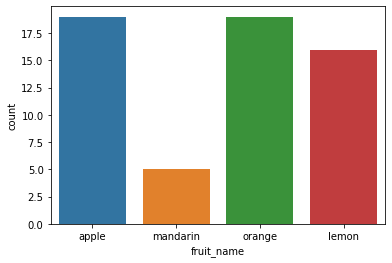

In [57]:
#types of fruits
print(fruit.groupby('fruit_name').size())
sns.countplot(fruit['fruit_name'],label="Count")

In [58]:
#preview data
print(fruit.head(15))

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [59]:
#Description of Data
print(fruit.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


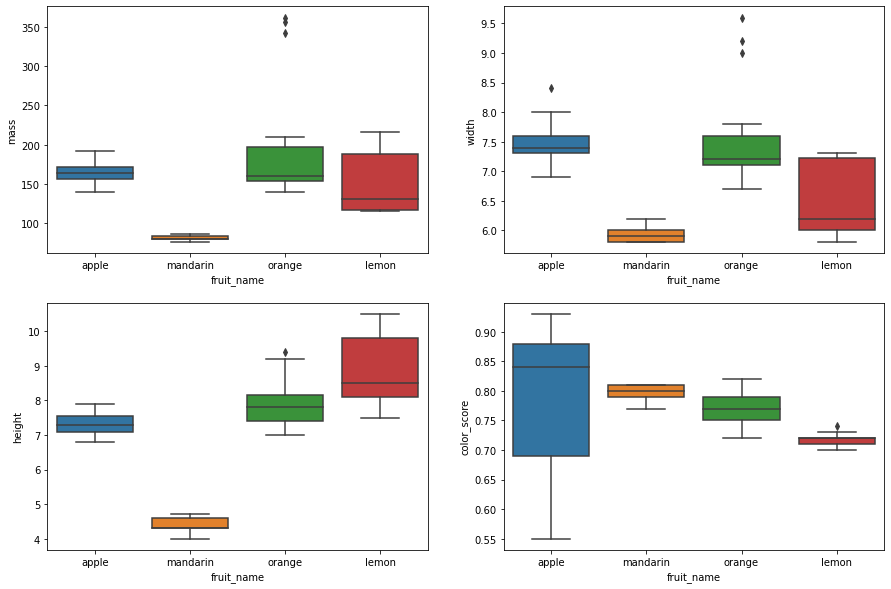

In [60]:
#Boxplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='fruit_name',y='mass',data=fruit)
plt.subplot(2,2,2)
sns.boxplot(x='fruit_name',y='width',data=fruit)
plt.subplot(2,2,3)
sns.boxplot(x='fruit_name',y='height',data=fruit)
plt.subplot(2,2,4)
sns.boxplot(x='fruit_name',y='color_score',data=fruit)

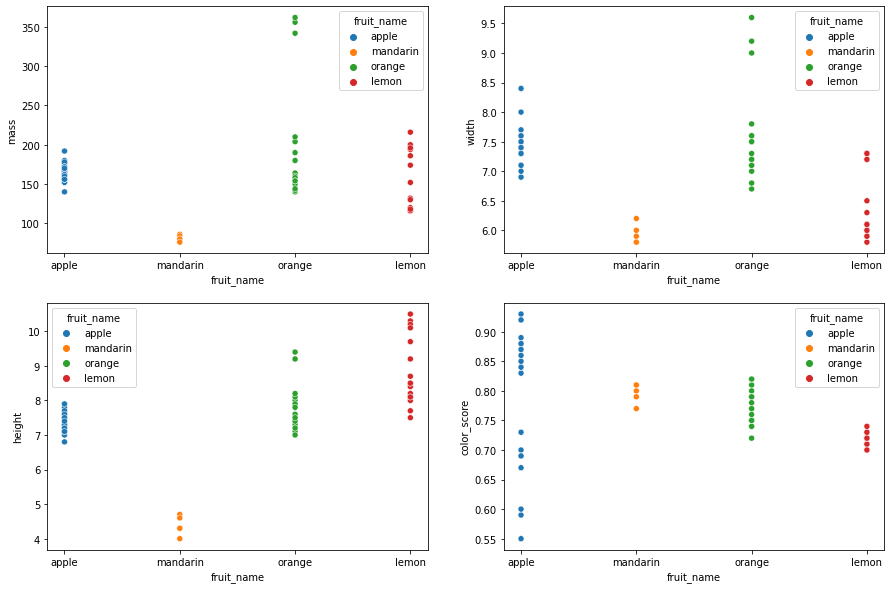

In [61]:
#Scatterplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='fruit_name',y='mass', data=fruit, hue='fruit_name')
plt.subplot(2,2,2)
sns.scatterplot(x='fruit_name',y='width',data=fruit, hue='fruit_name')
plt.subplot(2,2,3)
sns.scatterplot(x='fruit_name',y='height',data=fruit, hue='fruit_name')
plt.subplot(2,2,4)
sns.scatterplot(x='fruit_name',y='color_score',data=fruit, hue='fruit_name')

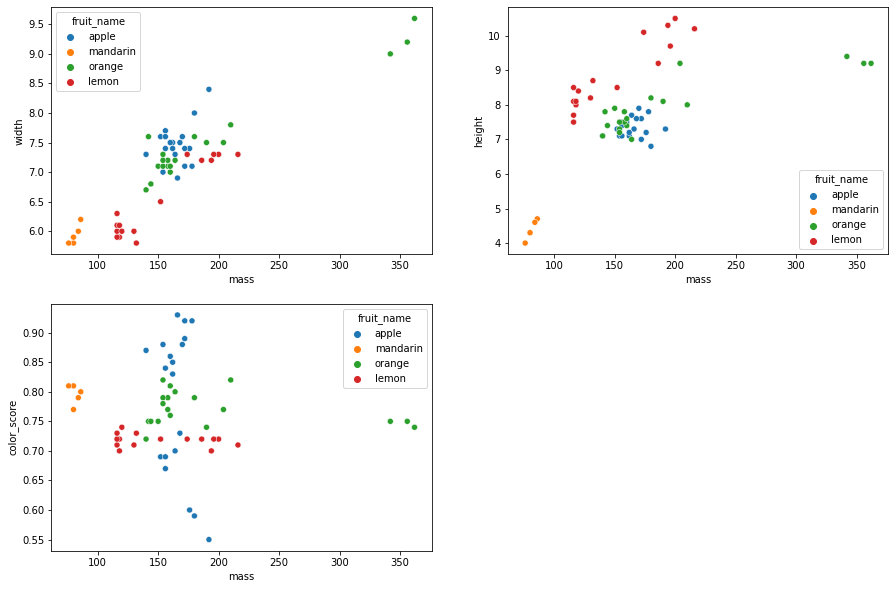

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='mass',y='width',data=fruit, hue='fruit_name')
plt.subplot(2,2,2)
sns.scatterplot(x='mass',y='height',data=fruit, hue='fruit_name')
plt.subplot(2,2,3)
sns.scatterplot(x='mass',y='color_score',data=fruit, hue='fruit_name')

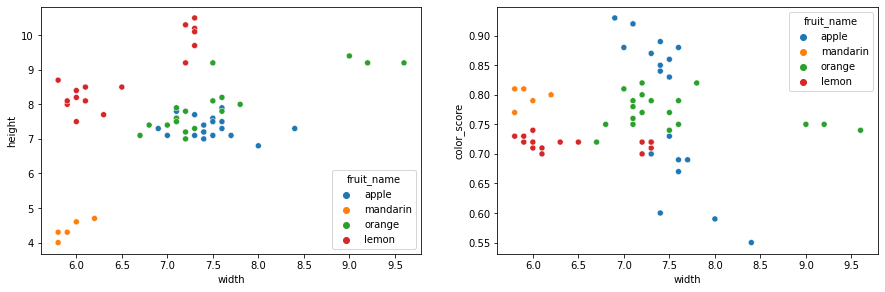

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='width',y='height',data=fruit, hue='fruit_name')
plt.subplot(2,2,2)
sns.scatterplot(x='width',y='color_score',data=fruit, hue='fruit_name')

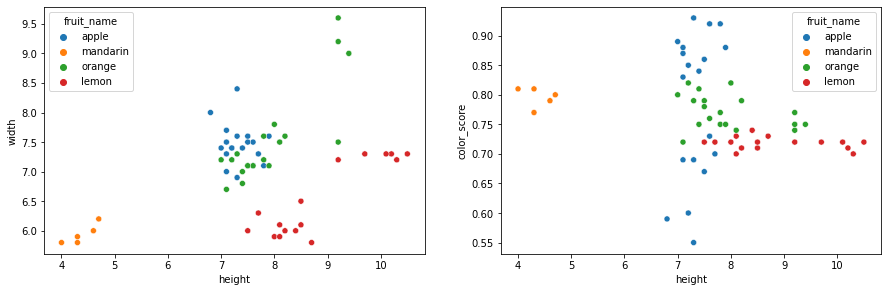

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='height',y='width',data=fruit, hue='fruit_name')
plt.subplot(2,2,2)
sns.scatterplot(x='height',y='color_score',data=fruit, hue='fruit_name')

In [65]:
feature_names = ['mass','width','height','color_score']
X = fruit[feature_names]
y = fruit['fruit_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Decision Tree Classifier:')
print('Accuracy of training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

Decision Tree Classifier:
Accuracy of training set: 1.00
Accuracy of test set: 0.67


In [67]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Logistic Regression:')
print('Accuracy of training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy of testing set: {:.2f}'
      .format(logreg.score(X_test, y_test)))


Logistic Regression:
Accuracy of training set: 0.75
Accuracy of testing set: 0.47


In [68]:
#KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('K Neighbors Classifier')
print('Accuracy of training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of testing set: {:.2f}'
      .format(knn.score(X_test, y_test)))

K Neighbors Classifier
Accuracy of training set: 0.95
Accuracy of testing set: 1.00


In [69]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('GaussianNB:')
print('Accuracy of training set: {:.2f}'
      .format(gnb.score(X_train, y_train)))
print('Accuracy of testing set: {:.2f}'
      .format(gnb.score(X_test, y_test)))

GaussianNB:
Accuracy of training set: 0.86
Accuracy of testing set: 0.67


In [70]:
#SVC
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Support Vector Machine:')
print('Accuracy of training set: {:.2f}'
      .format(svm.score(X_train, y_train)))
print('Accuracy of testing set: {:.2f}'
      .format(svm.score(X_test, y_test)))

Support Vector Machine:
Accuracy of training set: 0.91
Accuracy of testing set: 0.80


In [71]:
#Prediction
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

